# Trabajo Especial - Modelos y Simulación 2025
### Lucas Nieto y Alvaro Santiago Medina
---

# Problema

Se desea estimar mediante simulación estocástica la siguiente integral definida sobre el hipercubo $[0,1]^d$, donde $d=2,5,10$:
$$
I_d = \int_{[0,1]^d} \prod_{i=1}^d e^{-x_i^2}dx
$$

Como la integral es separable y tiene un valor exacto conocido, viene dado por:
$$
I_d = \bigg( \int_0^1 e^{-x_i^2}dx \bigg)^d = \bigg(\frac{\sqrt{\pi}}{2} \cdot erf(1)\bigg)
$$

Donde *erf* es la función error valuada en 1. Tal que:
$$
erf(1) = \frac{2}{\sqrt{\pi}}\int_0^1 e^{-t^2}dt \approx 0.8427
$$

Luego el valor de $I_d$ es tal que:
$$
I_d = \bigg(\frac{\sqrt{\pi}}{2} \cdot erf(1)\bigg) = \bigg(\frac{\sqrt{\pi}}{2} \cdot 0.8427 \bigg) = \boxed{0.74682}
$$

Para realizar la estimación se utilizará *Monte Carlo* con un número fijo de estimaciones.

Como Monte Carlo requiere de un generador de muestras uniformes en el $(0,1)$ se utilizarán los siguientes generadores:
- **Congruencial Lineal Mixto con parámetro**s $(a, c, m) = (16807, 0, 2^{31}-1)$
- **XORshift** 
- **Mersenne Twister** (MT19937)

Dichas implementaciones para los generadores podemos encontrarlas en la carpeta 📁`rngs/`

# Importaciones Generales

In [1]:
#%matplotlib widget <- Descomentar para poder maniobrar las figuras 3D
from constants import *
import numpy as np
import matplotlib.pyplot as plt
from MonteCarlo import MonteCarlo
from Utils import Utils
from rngs.Xorshift32 import Xorshift
from rngs.MersenneTwister import MersenneTwister
from rngs.LCG import LCG
from time import time

# Generadores

A través de la implementación de cada generador, analizaremos si los mismos caen en el problema de los *"Hiperplanos"*

## Semilla

Para que los resultados sean comparables seteamos una semilla general

In [2]:
SEED = int(time())

## Instancias

Generamos una instancia de para la clase de *Generador Congruencial Lineal, Xorshift y Mersenne Twister*  con la `seed` general

In [3]:
lcg = LCG(seed=SEED)
xorshift  = Xorshift(seed=SEED)
mersenne_twister = MersenneTwister(seed_value=SEED)

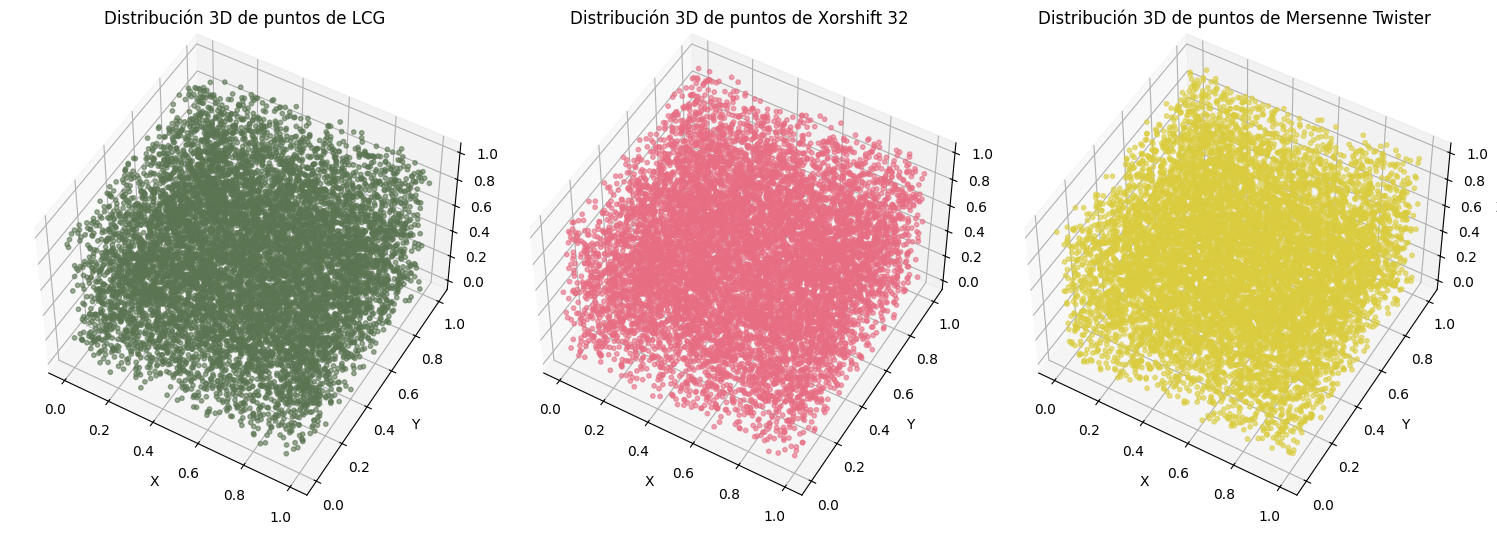

In [4]:
Utils.plot_3D_generators(generators=[lcg, xorshift, mersenne_twister], Nsamples=SAMPLE_SIZE_SMALL)

Seguido de esto realizamos las estimaciones de la integral utilizando Monte Carlo.

In [5]:
lcg_estimation = Utils.rng_estimation_gaussian_in_hipercube(
                    Nsamples=SAMPLE_SIZE_SMALL,
                    rng=lcg,
                    d=2
                )

lcg_cuad_error = Utils.rng_cuadratic_error_estimation(
                    Nsim=1, 
                    Nsamples=SAMPLE_SIZE_SMALL, 
                    rng=lcg,
                    d=2
                )

#Valor conocido de la integral
print(f"🤔 ESTIMACIÓN LCG -> {lcg_estimation:.6f}")
print(f"🎯 VALOR REAL -> {INTEGRAL_VAL_D2:.6f}")
print(f"🔴 ERROR CUADRÁTICO MEDIO de LCG -> {lcg_cuad_error:.6f}")

🤔 ESTIMACIÓN LCG -> 0.564551
🎯 VALOR REAL -> 0.557740
🔴 ERROR CUADRÁTICO MEDIO de LCG -> 0.000011


In [6]:
xorshift_estimation = Utils.rng_estimation_gaussian_in_hipercube(
                        Nsamples=SAMPLE_SIZE_SMALL,
                        rng=xorshift,
                        d=2
                    ) 

xorshift_cuad_error = Utils.rng_cuadratic_error_estimation(
                        Nsim=1, 
                        Nsamples=SAMPLE_SIZE_SMALL, 
                        rng=xorshift,
                        d=2
                    )

print(f"🤔 ESTIMACIÓN XORSHIFT -> {xorshift_estimation:.6f}")
print(f"🎯 VALOR REAL -> {INTEGRAL_VAL_D2:.6f}")
print(f"🔴 ERROR CUADRÁTICO MEDIO de XORSHIFT -> {xorshift_cuad_error:.6f}")

🤔 ESTIMACIÓN XORSHIFT -> 0.559329
🎯 VALOR REAL -> 0.557740
🔴 ERROR CUADRÁTICO MEDIO de XORSHIFT -> 0.000000


In [7]:
mersenne_twister_estimation = Utils.rng_estimation_gaussian_in_hipercube(
                                Nsamples=SAMPLE_SIZE_SMALL,
                                rng=mersenne_twister,
                                d=2
                            )

mersenne_twister_cuad_error = Utils.rng_cuadratic_error_estimation(
                                Nsim=1, 
                                Nsamples=SAMPLE_SIZE_SMALL, 
                                rng=mersenne_twister,
                                d=2
                            )

#Resultado Teórico
print(f"🤔 ESTIMACIÓN MERSENNE TWISTER -> {mersenne_twister_estimation:.6f}")
print(f"🎯 VALOR REAL -> {INTEGRAL_VAL_D2:.6f}")
print(f"🔴 ERROR CUADRÁTICO MEDIO de MT -> {mersenne_twister_cuad_error:.6f}")

🤔 ESTIMACIÓN MERSENNE TWISTER -> 0.559993
🎯 VALOR REAL -> 0.557740
🔴 ERROR CUADRÁTICO MEDIO de MT -> 0.000004


# Análisis

## Tiempo de estimación

In [8]:
sample_results = Utils.compare_time(Nsamples=SAMPLE_SIZE_SMALL, Nsim=100, seed=12345678, d=2)
print(f"{sample_results["LCG"]:.6f} secs")
print(f"{sample_results["Xorshift"]:.6f} secs")
print(f"{sample_results["MersenneTwister"]:.6f} secs")

0.624759 secs
0.973750 secs
2.177848 secs


In [9]:
sample_results = Utils.compare_muestral_stats(Nsamples=SAMPLE_SIZE_SMALL, Nsim=100, seed=12345678, d=2)
print(f"{sample_results["LCG"][1]:.6f}")
print(f"{sample_results["Xorshift"][1]:.6f}")
print(f"{sample_results['MersenneTwister'][1]:.6f}")

0.000007
0.000009
0.000007
